## Loading internet image

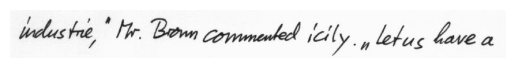

In [7]:
import requests
import matplotlib.pyplot as plt

url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image.convert("RGB")

# Plot the image
plt.axis('off')
plt.imshow(image)

## Loading local image

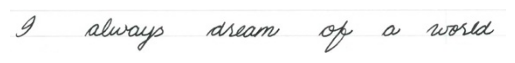

In [10]:
import os

# import training image
script_directory = os.getcwd()
folder_path = os.path.join(script_directory, 'Image')
file_name = 'handwritting_malala(crop)'
train_img = os.path.join(folder_path, f'{file_name}.jpg')

image = Image.open(train_img)
image.convert("RGB")

# Plot the image
plt.axis('off')
plt.imshow(image)

## TrOCR

In [4]:
!pip install transformers


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/fa/47/1a7daf04f40715fc1cdc6f1cc3200228a556d06c843e6ceb58883b745e1b/torch-2.1.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/59/af/426c2b90f5c4f8aba778746465af9e662680570e950e02379e91c6138285/torchvision-0.16.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/6b/ba/0e26883fd90f280452bed7edc7906ef9253255f395702751f65fa02afb5c/torchaudio-2.1.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.7 MB 7.0 MB/s eta 0:00:01
     ----- ---------------------------------- 0.8/5.7 MB 8.4 MB/s eta 0:00:01
     --------- ------------------------------ 1.4/5.7 MB 9.7 MB/s eta 0:00:01
     ------------- -------------------------- 2.0/5.7 MB 10.


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip3 install torch torchvision torchaudio


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Pre-train the model

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\generation\utils.py:1421: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
c:\Users\kinla\AppData

Our train image:


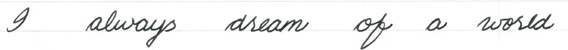

Recognition result:
I always dream of a world
Our test image:


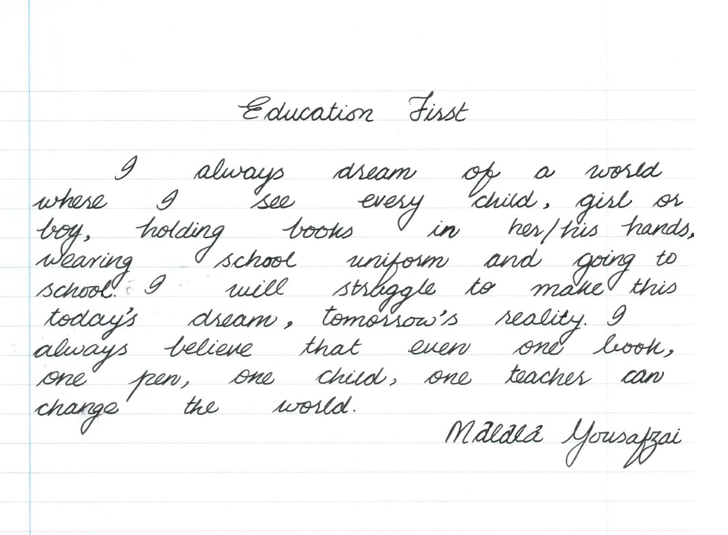

Recognition result:
spoken and the


In [13]:
from transformers import (
    TrOCRConfig,
    TrOCRProcessor,
    TrOCRForCausalLM,
    ViTConfig,
    ViTModel,
    VisionEncoderDecoderModel,
)
import requests
from PIL import Image

import IPython
import os

"""
Defining a set of functions to be used 
"""

# load image from the IAM dataset
def pixelize_image(img):
    image = Image.open(img).convert("RGB")
    pixel_values = processor(image, return_tensors="pt").pixel_values
    return pixel_values

# training
def training(processor, pixel_values, text):
    model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
    model.config.pad_token_id = processor.tokenizer.pad_token_id
    model.config.vocab_size = model.config.decoder.vocab_size

    labels = processor.tokenizer(text, return_tensors="pt").input_ids
    outputs = model(pixel_values, labels=labels)
    loss = outputs.loss
    round(loss.item(), 2)

# inference training image
def print_result(img, text, message1, message2):
    print(message1)
    IPython.display.display(IPython.display.Image(img))
    print(message2)
    print(text)

"""
Configuring the model
"""
# TrOCR is a decoder model and should be used within a VisionEncoderDecoderModel
# init vision2text model with random weights
encoder = ViTModel(ViTConfig())
decoder = TrOCRForCausalLM(TrOCRConfig())
model = VisionEncoderDecoderModel(encoder=encoder, decoder=decoder)

# If you want to start from the pretrained model, load the checkpoint with `VisionEncoderDecoderModel`
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

"""
Training the model
"""

# import training image
script_directory = os.getcwd()
folder_path = os.path.join(script_directory, 'Image')
file_name = 'handwritting_malala(crop)'
train_img = os.path.join(folder_path, f'{file_name}.jpg')

pixel_value_train = pixelize_image(train_img)
text = "I always dream of a world"

training(processor, pixel_value_train, text)

generated_ids = model.generate(pixel_value_train)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print_result(train_img, generated_text, "Our train image:", "Recognition result:")

"""
Using the model for inference
"""

# inference test image 
# import testing image
script_directory = os.getcwd()
folder_path = os.path.join(script_directory, 'Image')
file_name = 'handwritting_malala(full)'
test_img = os.path.join(folder_path, f'{file_name}.jpg')

pixel_values_test = pixelize_image(test_img)
generated_ids2 = model.generate(pixel_values_test)
generated_text2 = processor.batch_decode(generated_ids2, skip_special_tokens=True)[0]

print_result(test_img, generated_text2, "Our test image:", "Recognition result:")

